In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pylab import *
#import seaborn as sns
# File to Load (Remember to change these)
#city_data_to_load = "data/city_data.csv"
#ride_data_to_load = "data/ride_data.csv"

city_data_to_load = os.path.join("data","city_data.csv")
ride_data_to_load = os.path.join("data","ride_data.csv")


# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)



print(ride_data.head(2))
print("----")
print(city_data.head(2))


                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
----
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban


In [2]:
#Drop any duplicate row in city

#total_rows = city_data.count
city_data=city_data.drop_duplicates('city')
total_rows = city_data.count
# No duplicates in city found
#total_rows
print(city_data.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


In [3]:
print(ride_data.head())

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [4]:
# Combine the data into a single dataset"
city_ride_df=pd.merge(city_data, ride_data, on='city',how="outer")
# Display the data table for preview
city_ride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
# Create dataframe base on type Urban , SunUrban, Rural 

df_urban=city_ride_df.loc[city_ride_df['type']=='Urban']
print(df_urban.head(2))
df_suburban=city_ride_df.loc[city_ride_df['type']=='Suburban']
print(df_suburban.head(2))
df_rural=city_ride_df.loc[city_ride_df['type']=='Rural']
print(df_rural.head(2))


#Average Fare ($) Per City
df_urban_avg=df_urban.groupby('city')['fare'].mean()
#df_urban_avg.head()
df_suburban_avg=df_suburban.groupby('city')['fare'].mean()
#df_urban_avg.head()
df_rural_avg=df_rural.groupby('city')['fare'].mean()
#print(df_rural_avg.head())


#Total Number of Drivers

df_urban_driver=df_urban.groupby('city')['driver_count'].first()
#df_urban_driver
df_suburban_driver=df_suburban.groupby('city')['driver_count'].first()
#df_suburban_driver
df_rural_driver=df_rural.groupby('city')['driver_count'].first()
#df_rural_driver
#print(df_rider_city_type.head())

#Total Number of Rides Per City

df_urban_count=df_urban.groupby('city')['ride_id'].count()
#df_urban_count
df_suburban_count=df_suburban.groupby('city')['ride_id'].count()
#df_suburban_count
df_rural_count=df_rural.groupby('city')['ride_id'].count()
#df_rural_count
#print(df_rural_driver)
#df_rural_avg.head()


          city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
            city  driver_count      type                 date   fare  \
1625  Port Shane             7  Suburban  2018-04-09 15:34:40  27.66   
1626  Port Shane             7  Suburban  2018-04-23 16:05:47  42.26   

            ride_id  
1625  4022340141966  
1626  8341982666719  
                city  driver_count   type                 date   fare  \
2250  South Jennifer             7  Rural  2018-04-01 09:32:45  21.63   
2251  South Jennifer             7  Rural  2018-03-07 19:10:13  48.79   

            ride_id  
2250  9135979586871  
2251  9730627367446  


## Bubble Plot of Ride Sharing Data

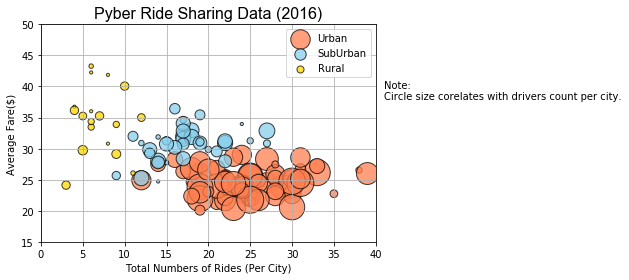

In [6]:
# Build the scatter plots for each city types
# plot for urban
plt.scatter(df_urban_count,df_urban_avg,s=df_urban_driver*10,marker="o", facecolors="Coral",
            edgecolors="black",alpha=0.75, linewidth=1,label="Urban")
#plot for suburban
plt.scatter(df_suburban_count,df_suburban_avg,s=df_suburban_driver*10,marker="o", facecolors="SkyBlue",
            edgecolors="black",alpha=0.75, linewidth=1,label="SubUrban")
#plot for rural
plt.scatter(df_rural_count,df_rural_avg,s=df_rural_driver*10,marker="o", facecolors="Gold",
            edgecolors="black",alpha=0.75, linewidth=1,label="Rural")

# Chart title
#plt.title("Pyber Ride Sharing Data (2016)")
plt.title("Pyber Ride Sharing Data (2016)",{'fontname':'Arial','fontsize':16})
plt.xlim(0,40)
plt.ylim(15,50)
# x label

plt.xlabel("Total Numbers of Rides (Per City)")

# y label
plt.ylabel("Average Fare($)")
# legend 
plt.legend(loc='upper right')
plt.grid(True)


figtext(.92, .62, "Note:\nCircle size corelates with drivers count per city.", rotation='horizontal')


plt.savefig("Images/Pyber_Ride_Sharing.png")
plt.show()






## Total Fares by City Type

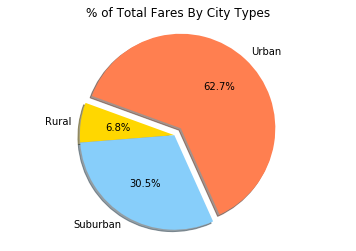

In [7]:
# Calculate Type Percents
total_fare=city_ride_df.groupby('type')['fare'].sum()
#total=total.sum()
# Labels for the sections of the pie chart
labels = ["Rural","Suburban","Urban" ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","coral"]
# The explode of each section of the pie chart
explode = (0, 0, 0.1)
# title for our pie chart
plt.title("% of Total Fares By City Types")
# generate pie chart
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
#The axis limits is set
plt.axis("equal")
#Save Figure
plt.savefig("Images/Total_Fares_ByTypesPie.png")
#Show Figure
plt.show()


## Total Rides by City Type

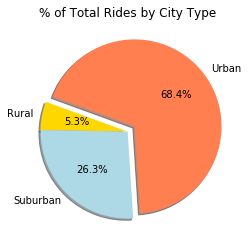

In [8]:
#% of Total Rides by City Type
total_ride=city_ride_df.groupby('type')['ride_id'].count()
#total_ride.head()
# Labels for the sections of our pie chart
labels=["Rural","Suburban","Urban"]
# colors for the sections of our pie chart
colors=["gold","lightblue","coral"]
# explode for the sections of our pie chart
explode=(0,0,0.1)
# title for our pie chart
plt.title("% of Total Rides by City Type")
# pie chart 
plt.pie(total_ride,labels=labels,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%",startangle=160)
#The axis limits is set
plt.axis="equal"
#Save Figure
plt.savefig("Images/Total_Rides_ByTypesPie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

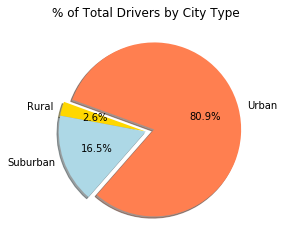

In [9]:
#% of Total Drivers by City Type
# Calculate Driver Percents
total_driver=city_ride_df.groupby(['city','type'])['driver_count'].first().reset_index(name ='driver_count')
total_driversum=total_driver.groupby('type')['driver_count'].sum()
total_driversum.head()
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
labels=["Rural","Suburban","Urban"]
colors=['gold','lightblue','coral']
explode=[0,0,0.1]
plt.pie(total_driversum,labels=labels,colors=colors,explode=explode,shadow=True,startangle=160,autopct="%1.1f%%")

#The axis limits is set
plt.axis="equal"

# Save Figure
plt.savefig("Images/Total_Drivers_ByTypesPie.png")
# Show Figure
plt.show()

In [10]:
# Show Figure
#plt.show()